### Outline:

Structure of hippocampus: MEC, DG (granule, mossy, interneuron), CA3, CA1
Each neuron performs weighted sum of inputs
Different parts of hippocampus have different functions: sparsity/pattern separation; recurrence/pattern completion;
The focus of this project will be on DG circuitry and how mossy cells and interneurons interact with granule cells to produce sparsity

Part 1 - how are signals transformed/processed in a single layer of a simple neural network (e.g. from MEC to granule cells)

### Research questions:
Input pattern: all binary combinations

1) In a single layer (only MEC+Granule cells), how does dynamics depend on initial weight distribution

Outputs to measure:

*   Variance in output (over time and over units)
*   How separable are the patterns in the output layer? E.g. Euclidean distance, plot with dimensionality reductions

In [1]:
# Simple network
# All permutations of input pattern
# Fixed weights
# 2 populations: E and FF-I
# Introduce transfer function (relu)
# 1 - unbounded relu -> explosion of activity
# 2 - bounded relu -> saturation
# 3 - interneurons control dynamic range
# 4 - explore different weight distributions
# 5 - plot stuff: histogram of correlations, activity heatmap, input-output plot for single neuron/heatmap for multiple


In [3]:
import numpy as np

# Define parameters of the network

population_size_dict = {'input':7, 'granule':1}

initial_weights = lambda pre,post: np.random.uniform(0,1,[pre,post]) #Sample initial weights from a uniform random distribution
weight_dict = {'FFE':initial_weights(population_size_dict['input'],population_size_dict['granule'])}

activity_dict = {'input':[], 'granule':[]}

In [4]:
# Define what happens when we run a simulation

def simulate_network(all_input_patterns,weight_dict,activity_dict):

  number_of_patterns = len(all_input_patterns)
  
  for t in range(number_of_patterns): #Present each input pattern for 1 ms
    input_pattern = all_input_patterns[t]
    granule_activity = np.sum(input_pattern * weight_dict['FFE']) #Output activity is weighted sum of inputs
    
    #Store values of input and output
    activity_dict['input'].append(input_pattern)
    activity_dict['granule'].append(granule_activity)

  return activity_dict

In [5]:
# Define input patterns

import itertools
def listAllBinaryPermutations(n):
    input_patterns = []
    for pattern in itertools.product([0,1],repeat=n):
        input_patterns.append(pattern)
    return input_patterns

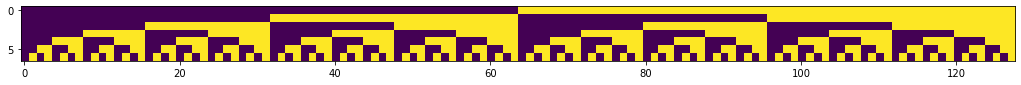

(0, 0, 0, 0, 0, 0, 0)
(0, 0, 0, 0, 0, 0, 1)
(0, 0, 0, 0, 0, 1, 0)
(0, 0, 0, 0, 0, 1, 1)


In [6]:
# Visualize what the different input patterns look like

import matplotlib.pyplot as plt

patterns = listAllBinaryPermutations(7)

fig = plt.figure(figsize=(100,1))
plt.imshow(np.transpose(patterns))
plt.show()

print(patterns[0])
print(patterns[1])
print(patterns[2])
print(patterns[3])

In [7]:
# Run the simulation, using the input patterns we just defined

all_input_patterns = listAllBinaryPermutations(population_size_dict['input'])

activity_dict = simulate_network(all_input_patterns, weight_dict, activity_dict)

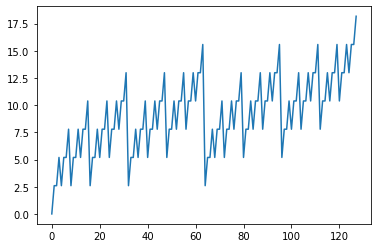

In [8]:
a = activity_dict['granule']
plt.plot(a)
plt.show()

In [9]:
# In the case of multiple output neurons, we can vectorize the simulation:

population_size_dict = {'input':7, 'granule':100}
weight_dict = {'FFE':initial_weights(population_size_dict['input'],population_size_dict['granule'])}
activity_dict = {'input':[], 'granule':[]}


def simulate_network(all_input_patterns,weight_dict,activity_dict):

  number_of_patterns = len(all_input_patterns)
  
  for t in range(number_of_patterns): #Present each input pattern for 1 ms
    input_pattern = all_input_patterns[t]
    granule_activity = np.matmul(input_pattern,weight_dict['FFE']) #Output activity is weighted sum of inputs
    
    #Store values of input and output
    activity_dict['input'].append(input_pattern)
    activity_dict['granule'].append(granule_activity)

  return activity_dict

In [13]:
activity_dict = simulate_network(all_input_patterns, weight_dict, activity_dict)

In [31]:
a = np.array(activity_dict['granule'])
a.shape
#neuron1 = a[:,1]
#pattern1 = a[1,:]

(128, 100)

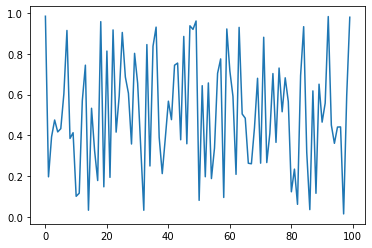

In [35]:
plt.plot(neuron1)
plt.show()